In [195]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Load and Explore the Data

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
# Load the CSV file into a pandas DataFrame
titanic_data = pd.read_csv('C:/Users/lenovo/Desktop/CodSoft/TITANIC-SURVIVAL-PREDICTION/Titanic-Dataset.csv')

# Display the first few rows of the DataFrame
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
print(titanic_data.head())
print("\n Shape of DataFrame: ", titanic_data.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

 

In [199]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [200]:
print(titanic_data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [201]:
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [202]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


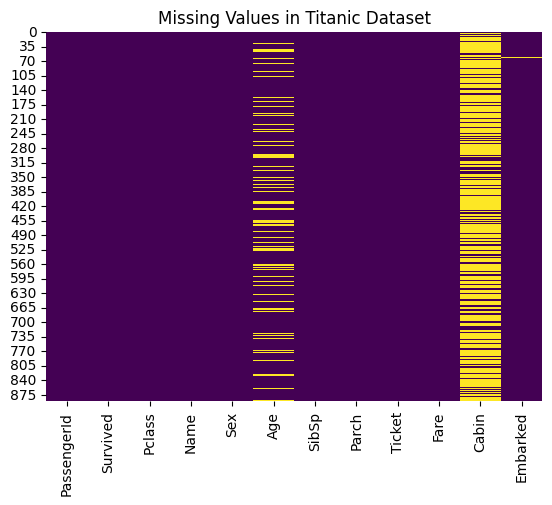

In [203]:
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Titanic Dataset')
plt.show()

### Data Visualization

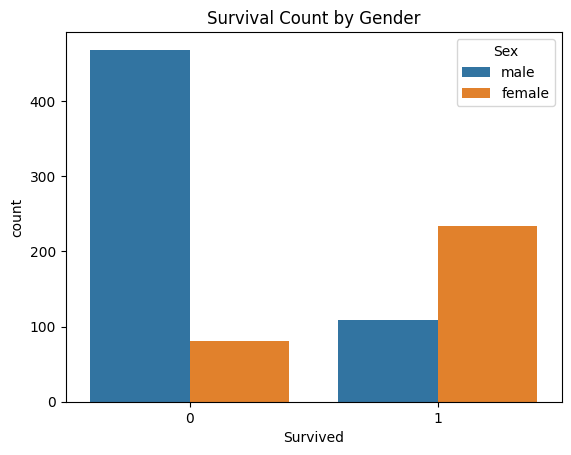

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of survival based on gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival Count by Gender')
plt.show()

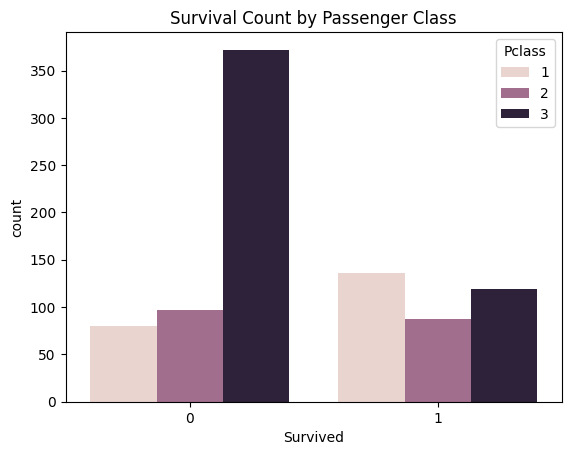

In [205]:
# Countplot of survival based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival Count by Passenger Class')
plt.show()

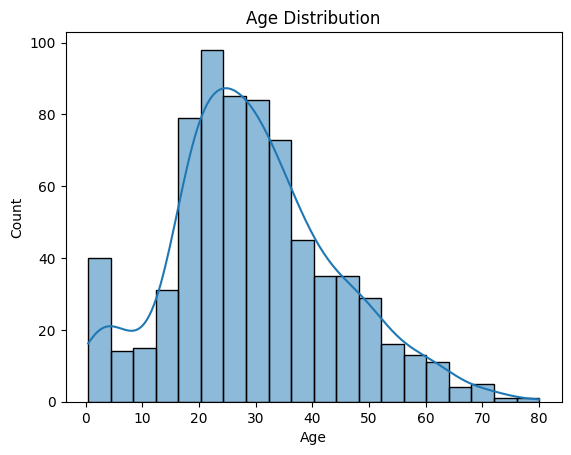

In [206]:
# Histogram of age distribution
sns.histplot(titanic_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

### Data Preprocessing

In [207]:
# Drop irrelevant columns and handle missing values
columns_to_drop = ['Name', 'Ticket', 'Cabin']
titanic_data.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # Add errors='ignore' to handle missing columns gracefully

# Fill missing values in 'Age' with median
median_age = titanic_data['Age'].median()
titanic_data['Age'] = titanic_data['Age'].fillna(median_age)

# Fill missing values in 'Embarked' with mode (most frequent value)
mode_embarked = titanic_data['Embarked'].mode()[0]
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(mode_embarked)

In [208]:
# Display the shape of the modified DataFrame
print("Shape of modified DataFrame: ", titanic_data.shape)

# Display the first few rows of the modified DataFrame
print("\nFirst few rows of modified DataFrame: \n", titanic_data.head())

Shape of modified DataFrame:  (891, 9)

First few rows of modified DataFrame: 
    PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


In [209]:
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


In [210]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)
# Drop irrelevant columns
titanic_data.drop(columns=['PassengerId'], inplace=True)  # Assuming PassengerId is irrelevant for prediction


In [211]:
print(titanic_data.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [212]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


### Model Building

In [213]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [214]:
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=100, random_state=42)
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

### Model Evaluation

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Confusion Matrix:\n{confusion}')


Accuracy: 0.8044692737430168
Precision: 0.7532467532467533
Recall: 0.7837837837837838
Confusion Matrix:
[[86 19]
 [16 58]]


### Evaluate the Model

In [216]:
predictions = model.predict(X_test)


In [217]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
cr = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


Accuracy: 0.8044692737430168
Confusion Matrix:
 [[86 19]
 [16 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       105
           1       0.75      0.78      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179



### Make Predictions on the Entire Dataset

In [218]:
all_predictions = model.predict(X)

In [219]:
titanic_data['Predicted_Survived'] = all_predictions

In [220]:
titanic_data.to_csv('Titanic_Prediction.csv', index=False)

In [221]:
titanic_data.info()
titanic_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Age                 891 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Fare                891 non-null    float64
 6   Sex_male            891 non-null    bool   
 7   Embarked_Q          891 non-null    bool   
 8   Embarked_S          891 non-null    bool   
 9   Predicted_Survived  891 non-null    int64  
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Predicted_Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.379349
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.485498
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [222]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Predicted_Survived
0,0,3,22.0,1,0,7.2500,True,False,True,0
1,1,1,38.0,1,0,71.2833,False,False,False,1
2,1,3,26.0,0,0,7.9250,False,False,True,1
3,1,1,35.0,1,0,53.1000,False,False,True,1
4,0,3,35.0,0,0,8.0500,True,False,True,0


In [223]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the predictions from the CSV file
predictions = pd.read_csv('Titanic_Prediction.csv')

# Calculate evaluation metrics
accuracy = accuracy_score(predictions['Survived'], predictions['Predicted_Survived'])
precision = precision_score(predictions['Survived'], predictions['Predicted_Survived'])
recall = recall_score(predictions['Survived'], predictions['Predicted_Survived'])
f1 = f1_score(predictions['Survived'], predictions['Predicted_Survived'])

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# Print the classification report
print(classification_report(predictions['Survived'], predictions['Predicted_Survived']))

# Print the confusion matrix
print(confusion_matrix(predictions['Survived'], predictions['Predicted_Survived']))

Accuracy: 0.9438832772166106
Precision: 0.9319526627218935
Recall: 0.9210526315789473
F1 Score: 0.9264705882352942
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       549
           1       0.93      0.92      0.93       342

    accuracy                           0.94       891
   macro avg       0.94      0.94      0.94       891
weighted avg       0.94      0.94      0.94       891

[[526  23]
 [ 27 315]]
